In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

import pydotplus
from IPython.display import Image


Bad key "text.kerning_factor" on line 4 in
C:\Users\tbder\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
elon_csv_path = Path('../group1-project2-main/elon_df.csv')
elon_signals_df = pd.read_csv(elon_csv_path)
tsla_csv_path = Path('../group1-project2-main/TSLA_prices_df.csv')
tsla_results_df = pd.read_csv(tsla_csv_path)
total_data_path = Path('../group1-project2-main/total_data.csv')
total_data = pd.read_csv(total_data_path)

In [3]:
total_data.head()

,Unnamed: 0,date,TSLA,earnings flag,tweet_length,encoded_sentiment,sentiment,polairty,tweet
0,1970-01-01 00:00:00.000000361,2011-12-01,-0.028,0.0,118.0,0.0,neutral,0.000,I made the volume on the Model S http://t.co/...
1,1970-01-01 00:00:00.000000362,2011-12-01,-0.028,0.0,141.0,1.0,positive,0.650,Went to Iceland on Sat to ride bumper cars on ...
2,1970-01-01 00:00:00.000000376,2011-12-21,-0.066,0.0,62.0,1.0,positive,0.250,Yum! Even better than deep fried butter: http...
3,1970-01-01 00:00:00.000000377,2011-12-21,-0.066,0.0,140.0,-1.0,negative,-0.025,"Yeah, this really is me, as my Mom will attest..."
4,1970-01-01 00:00:00.000000378,2011-12-21,-0.066,0.0,136.0,-1.0,negative,-0.500,Got called randomly by Kanye West today and re...


In [4]:
total_data = total_data.set_index('date')

In [5]:
total_data = total_data.drop(columns = ['Unnamed: 0', 'sentiment', 'tweet'])

In [6]:
total_data.head()

,TSLA,earnings flag,tweet_length,encoded_sentiment,polairty
date,,,,,
2011-12-01,-0.028,0.0,118.0,0.0,0.000
2011-12-01,-0.028,0.0,141.0,1.0,0.650
2011-12-21,-0.066,0.0,62.0,1.0,0.250
2011-12-21,-0.066,0.0,140.0,-1.0,-0.025
2011-12-21,-0.066,0.0,136.0,-1.0,-0.500


In [7]:
dropped_data = total_data.drop(['TSLA','earnings flag'], axis=1)
X = dropped_data
X.columns

Index(['tweet_length', 'encoded_sentiment', 'polairty'], dtype='object')

In [8]:
y = total_data['earnings flag'].ravel()
y2 = total_data['TSLA'].ravel()
y

array([0., 0., 0., ..., 1., 1., 1.])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [11]:
scaler = StandardScaler()

In [12]:
X_scaler = scaler.fit(X_train)
X_scaler

StandardScaler()

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_scaled = X_scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2
0,0.411990,-0.470224,-0.466503
1,0.758282,0.961822,2.046748
2,-0.431155,0.961822,0.500132
3,0.743226,-1.902271,-0.563166
4,0.683001,-1.902271,-2.399772
5,0.261429,-0.470224,-0.466503
6,0.562552,-0.470224,-0.466503
7,0.291541,0.961822,2.046748
8,0.276485,0.961822,1.900288
9,0.442103,-1.902271,-0.788714


In [14]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [15]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [16]:
predictions = rf_model.predict(X_test_scaled)
predictions

array([0.352     , 0.7065868 , 0.48753907, ..., 0.697     , 0.58248954,
       0.4245687 ])

In [17]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.2944024889660926


In [18]:
predictions = rf_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, predictions)


In [19]:
print(mse)

0.13724295961947333


In [20]:
importances = rf_model.feature_importances_

In [21]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5648470375520265, 'tweet_length'),
 (0.42147243134077894, 'polairty'),
 (0.013680531107194617, 'encoded_sentiment')]

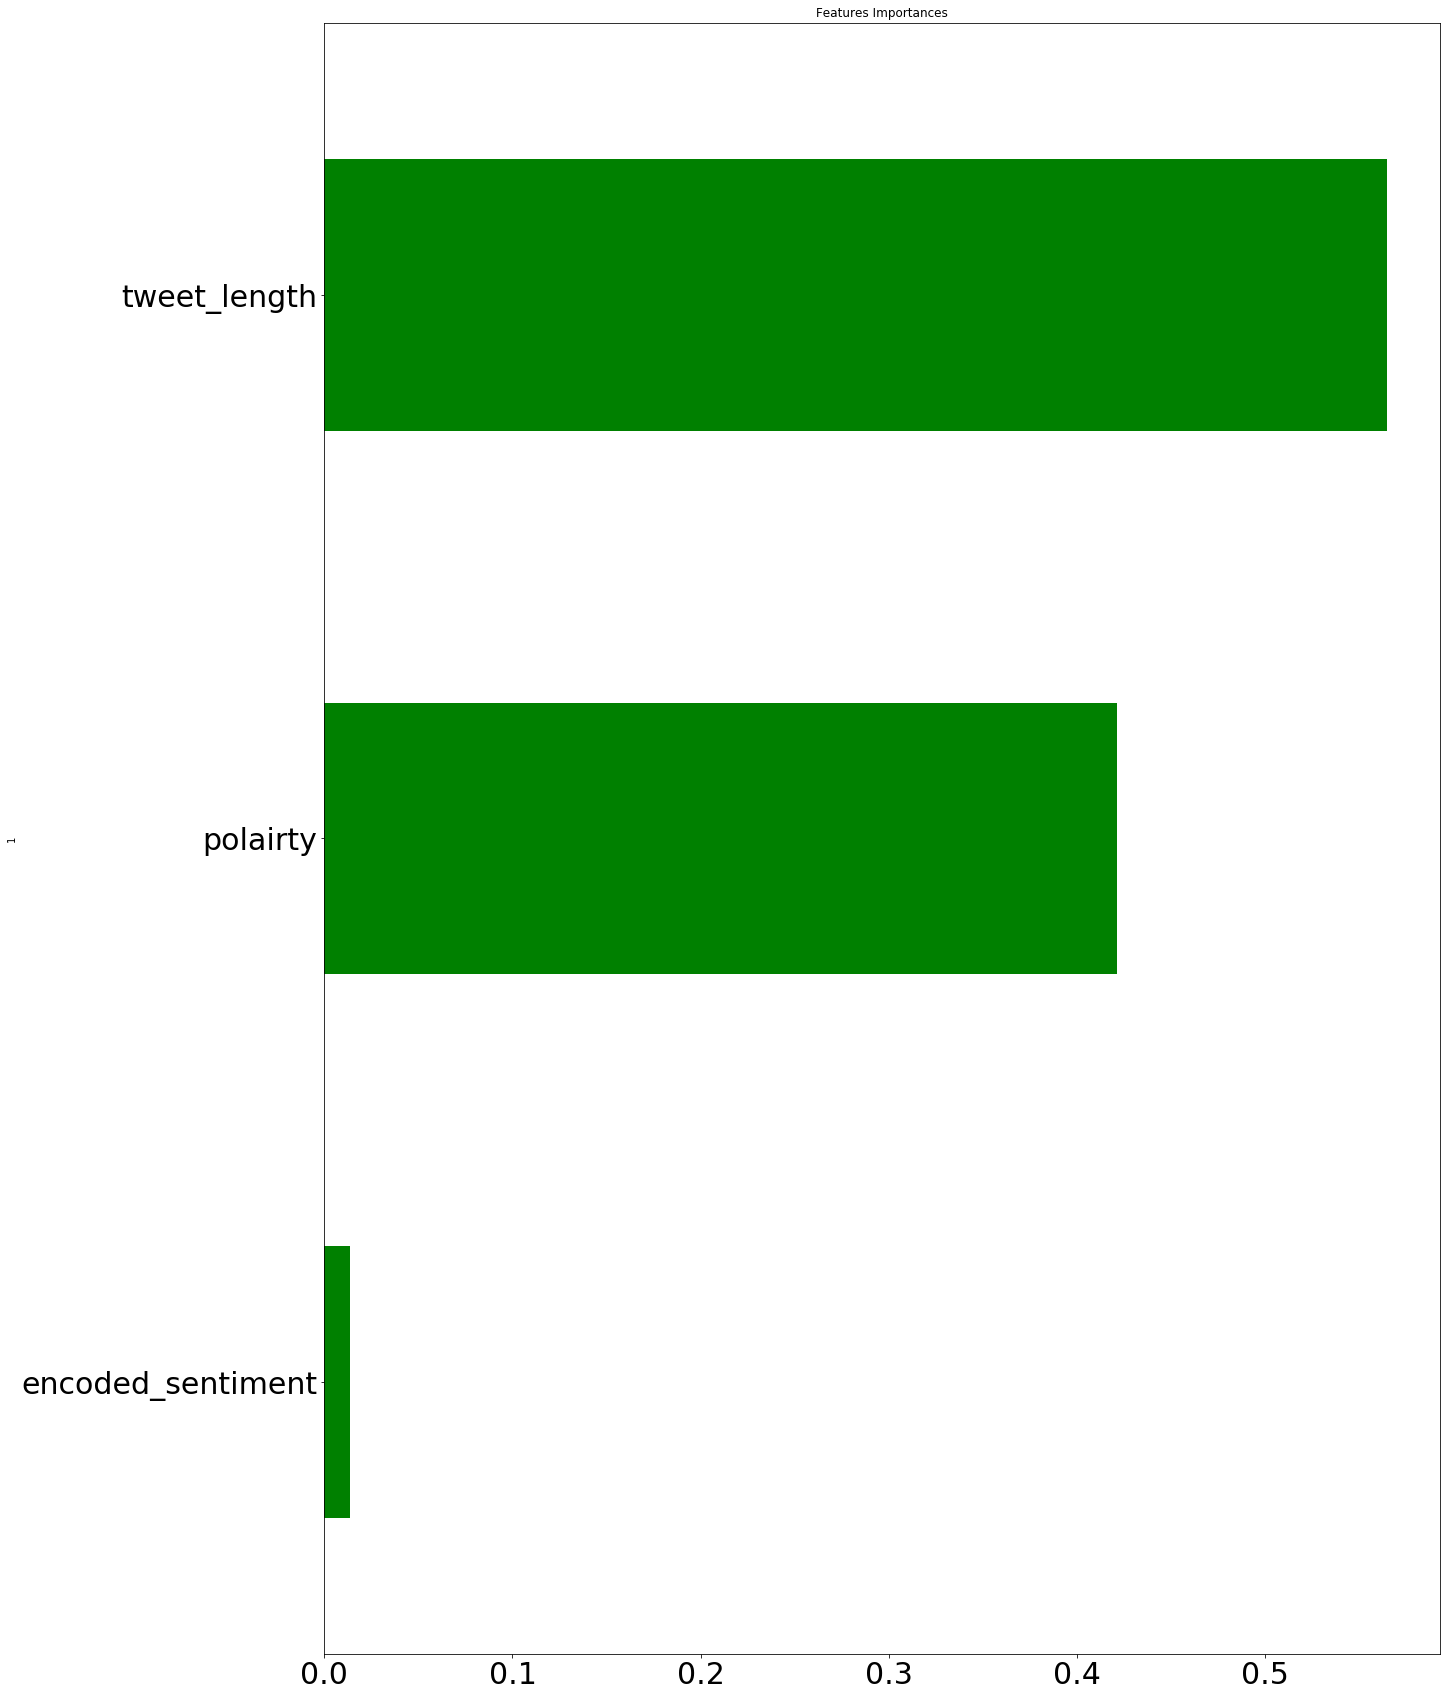

In [22]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', 
                        figsize=(20,30), legend=False, fontsize=30)

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, random_state=78)


In [24]:
scaler = StandardScaler()

In [25]:
X_scaler2 = scaler.fit(X_train)
X_scaler2

StandardScaler()

In [26]:
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)
X_test_scaled2 = pd.DataFrame(X_test_scaled2)
X_scaled2 = X_scaler2.transform(X)
X_scaled2 = pd.DataFrame(X_scaled2)
X_scaled2

,0,1,2
0,0.411990,-0.470224,-0.466503
1,0.758282,0.961822,2.046748
2,-0.431155,0.961822,0.500132
3,0.743226,-1.902271,-0.563166
4,0.683001,-1.902271,-2.399772
5,0.261429,-0.470224,-0.466503
6,0.562552,-0.470224,-0.466503
7,0.291541,0.961822,2.046748
8,0.276485,0.961822,1.900288
9,0.442103,-1.902271,-0.788714


In [28]:
rf_model2 = RandomForestRegressor(n_estimators=500, random_state=78)

In [29]:
rf_model2 = rf_model2.fit(X_train_scaled2, y_train2)

In [32]:
predictions2 = rf_model2.predict(X_test_scaled2)
predictions2

array([ 2.68754939, -0.57198783,  2.24958869, ...,  4.78410191,
       -0.44818335,  4.45927489])

In [34]:
mse2 = mean_squared_error(y_test2, predictions2)
print(mse2)

156.54714048115764


In [35]:
predictions2 = rf_model2.predict(X_train_scaled2)
mse2 = mean_squared_error(y_train2, predictions2)

In [36]:
print(mse)

0.13724295961947333


In [38]:
importances2 = rf_model2.feature_importances_

In [40]:
sorted(zip(rf_model2.feature_importances_, X.columns), reverse=True)

In [ ]:
importances_df2 = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df2.set_index(importances_df[1], inplace=True)
importances_df2.drop(columns=1, inplace=True)
importances_df2.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted2 = importances_df2.sort_values(by='Feature Importances')
importances_sorted2.plot(kind='barh', color='green', title= 'Features Importances', 
                        figsize=(20,30), legend=False, fontsize=30)

In [46]:
data_list = list(total_data.columns)
data_list

['TSLA', 'earnings flag', 'tweet_length', 'encoded_sentiment', 'polairty']